# Redes Neuronales

##  Perceptron de Rosenblatt (1958) 


It is only after much hesitation that the writer has reconciled himself to the addition of the term "neurodynamics" to the list of such recent linguistic artifacts as "cybernetics, "bionics",..., "intelectronics", and "robotics". It is hoped that by selecting a term which more clearly delimits our realm of interest and indicates its relationship to traditional academic disciplines, the underlying motivation of the perceptron program may be more successfully communicated. The term "perceptron", originally intended as a generic name for a variety of ***theoretical nerve nets***, has an unfortunate tendency to suggest a specific piece of hardware...

For this writer, the perceptron program is not primarily concerned with the invention of devices for **"artificial intelligence"**, but rather with investigating the physical structures and neurodynamic principles which underlie "natural intelligence". A perceptron is first and foremost a brain model, not an invention for pattern recognition. As a brain model, its utility is in enabling us to determine the physical conditions for the emergence of various psychological properties.

Prefacio de Frank Rossenblatt de su libro $\text{Principles of Neurodynamics: Perceptrons and the Theory of Brain Mechanisms}$, Spartan Books, 1962

El objetivo inicial de Rosenblatt era hacer un modelo del cerebro humano para entenderlo mejor y no un mecanismo para el reconocimiento de patrones. 

Fueron otros los que usaron los principios propuestos por Rosenblatt y los aplicaron para resolver el problema de reconocimiento de patrones. 

El perceptron de Rosenblat es un algorítmo que resulve el problema de clasificación binaria. Es un tipo de clasificador lineal, es decir, solo puede clasificar problemas con datos que son linealmente separables.

<img src='https://miro.medium.com/max/870/1*gKFs7YU44vJFiS2rF3-bpg.png'>

El perceptrón por su forma solamente podría resolver datasets que son linealmente separables.

### Algorítmo de Aprendizaje del perceptron. Ajustando W

<img src='https://miro.medium.com/max/516/1*PbJBdf-WxR0Dd0xHvEoh4A.png'> 

In [1]:
import pandas as pd
import numpy as np

In [24]:
conjunto_de_entrenamiento_df = pd.DataFrame([((1, 0, 0), 1), ((1, 0, 1), 1), ((1, 1, 0), 1), ((1, 1, 1), 0)], columns=['data', 'target'])
conjunto_de_entrenamiento_df

,data,target
0,"(1, 0, 0)",1
1,"(1, 0, 1)",1
2,"(1, 1, 0)",1
3,"(1, 1, 1)",0


In [36]:
umbral = 0.5
tasa_de_aprendizaje = 0.1
pesos = [0, 0, 0]
conjunto_de_entrenamiento = [((1, 0, 0), 1), ((1, 0, 1), 1), ((1, 1, 0), 1), ((1, 1, 1), 0)]

def producto_punto(valores, pesos):
    return sum(valor * peso for valor, peso in zip(valores, pesos))

while True:
    print('-' * 60)
    contador_de_errores = 0
    for vector_de_entrada, salida_deseada in conjunto_de_entrenamiento:
        print('Los pesos son: ')
        print(pesos)
        resultado = producto_punto(vector_de_entrada, pesos) > umbral
        print('El resultado es: '+str(int(resultado)))
        print('Se esperaba: '+str(salida_deseada))
        error = salida_deseada - resultado
        print('Entonces el error es: '+str(error))
        if error != 0:
            contador_de_errores += 1
            for indice, valor in enumerate(vector_de_entrada):
                pesos[indice] += tasa_de_aprendizaje * error * valor
        print('\nEl contador de errores es: '+str(contador_de_errores)+'\n')
        
    if contador_de_errores == 0:
        print("\nFinalmente, el error es 0!")
        break

------------------------------------------------------------
Los pesos son: 
[0, 0, 0]
El resultado es: 0
Se esperaba: 1
Entonces el error es: 1

El contador de errores es: 1

Los pesos son: 
[0.1, 0.0, 0.0]
El resultado es: 0
Se esperaba: 1
Entonces el error es: 1

El contador de errores es: 2

Los pesos son: 
[0.2, 0.0, 0.1]
El resultado es: 0
Se esperaba: 1
Entonces el error es: 1

El contador de errores es: 3

Los pesos son: 
[0.30000000000000004, 0.1, 0.1]
El resultado es: 0
Se esperaba: 0
Entonces el error es: 0

El contador de errores es: 3

------------------------------------------------------------
Los pesos son: 
[0.30000000000000004, 0.1, 0.1]
El resultado es: 0
Se esperaba: 1
Entonces el error es: 1

El contador de errores es: 1

Los pesos son: 
[0.4, 0.1, 0.1]
El resultado es: 0
Se esperaba: 1
Entonces el error es: 1

El contador de errores es: 2

Los pesos son: 
[0.5, 0.1, 0.2]
El resultado es: 1
Se esperaba: 1
Entonces el error es: 0

El contador de errores es: 2

Los p

<img src= 'PerceptroTraining1.jpg'>

<img src= 'PerceptroTraining2.jpg'>

<img src= 'PerceptroTraining3.jpg'>

<img src= 'PerceptroTraining4.jpg'>

## Redes Neuronales 

(Warren McCulloch y Walter Pitts ) (1943)



### Neuronas

Fuente de la mayoría de lo que sigue: https://victorzhou.com/blog/intro-to-neural-networks/


<img src='https://i.stack.imgur.com/KUvpQ.png'>

Las redes neuronales difieren de los perceptrones en que una transformación no-lineal diferenciable es aplicada en la salida. En las redes neuronales, para cada neurona se cumple lo siguiente:

Si tenemos $x_i$ inputs para una neurona y $w_i$ pesos con $x_0 = 1$ y $w_0=b$, entonces el proceso de calculo de la señal de salida de la neurona es: 

$$f( \sum_{i=o}^{n} x_i*w_i)$$

La función f es llamada una función de activación y hay varias usadas en la literatura. Una común es la función sigmoide, que ya encontrabamos cuando tratabamos el tema de regresión logística. 

Recuerden que la función sigmoide está dada por: 
$$f(x)=\frac{1}{1+e^{-x}}$$

<img src='https://victorzhou.com/static/dd5a39500acbef371d8d791d2cd381e0/e334e/sigmoid.png'>

### Ejemplo: 
Supongan que tenemos una red con los siguientes parametros para los pesos y el 'sesgo': 

$$w=[0,1]$$
$$b = 4 $$

Le damos a la red de una neurona una entrada como la que sigue: $ x = [2, 3]$. Usando la función sigmoide cual sería el resultado de pasar estos inputs por nuestra neurona. 

Los elempentos de entrada multiplicada por los pesos resulta en: 

$$b+ w_1*x_1 + w_2*x_2 = 0*2+1*3+4 =7 $$

Luego, debemos hacer la transformación no lineal:

$$f(7) =\frac{1}{1+e^{-7}} = 0.99$$

El resultado para una neurona con estos pesos y ese vector de entrada es 0.99.

### Más de una capa

Ahora supongamos que tenemos más de una neurona. Y supongamos que están organizadas en capas. La capa inicial o Input layer es la que interactua directamente con los vectores de entrada. 

Las capas siguientes se llaman capas ocultas o hidden layers y la última capa, es la capa de salida o Output Layer. 

<img src='https://victorzhou.com/77ed172fdef54ca1ffcfb0bba27ba334/network.svg'>

Siguiendo con el ejemplo anterior, asumamos que todas las neuronas tienen los mismos pesos $w=[0,1]$ y el sesgo $b=0$, y que los valores de entrada son igual que antes $x = [2, 3]$:




Siguiendo con el ejemplo anterior, asumamos que todas las neuronas tienen los mismos pesos $w=[0,1]$ y el sesgo $b=0$, y que los valores de entrada son igual que antes $x = [2, 3]$:


$$h_1 =h_2  
=f(w⋅x+b)
=f((0∗2)+(1∗3)+0)
=f(3)
=0.9526$$


$$ o_1 =f(w⋅[h_1 ,h_2 ]+b)$$ 

$$=f((0∗h_1)+(1∗h_2)+0)=f(0.9526) =  0.7216 $$

 

La salida de la red es 0.7216. Siempre que tengan una red neuronal el proceso de propagación de información de entrada a la información de salida se realiza de la misma manera. Este proceso se llama ***feedforward***

## Entrenando una red neuronal

Lo primero que debemos hacer es comparar el resultado de la predicción de la red neuronal con el valor real que queríamos aprender. Como vimos con el perceptron el proceso de ajuste de los pesos se realiza de manera iterativa tomando cada uno de las observaciones en el dataset y el proceso termina cuando el error en cada una de las observaciones es 0. 

Función de Error o "Perdida": 
La función error a usar depende del problema, si es regresión o clasificación. En regresión, en el caso de regresión podemos usar el error cuadrado promedio: 

$$ MSE  = \frac{1}{n} \sum_{i_0}^n (y_{real}-y_{pred})^2 $$

donde $y_{pred}$ es el resultado de pasar datos de entrada $x$ a traves de la red neuronal.

In [72]:
def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])

print(mse_loss(y_true, y_pred)) 

0.5


## Objetivo: Minimizar el error o perdida. 

Para lograr cambiar la predicción y por ende la pérdida, podemos cambiar los pesos de la red. ¿Cómo se relaciona el error de predicción y los pesos?

<img src='https://victorzhou.com/27cf280166d7159c0465a58c68f99b39/network3.svg'>

Entonces la función perdida es una función de todos los pesos y sesgos de cada neurona en el modelo.

$$L(w_1, w_2, w_3, w_4, w_5, w_6, b_1, b_2, b_3)$$

## Backpropagation. 

Queremos enteder como la función perdidad cambia al cambiar los pesos, por ejemplo $w_1$, para eso podríamos calcular $\frac{\partial L}{\partial w_1}$.

Usando la regla de la cadena vemos que $\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial y_{pred}} * \frac{\partial y_{pred}}{\partial w_1}$

El cambio en $w_1$ afecta la salida de la hidden unit $h_1$. Entonces podemos descomponer el último término aún mas: 

$$\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial y_{pred}} *\frac{\partial y_{pred}}{\partial h_1}* \frac{\partial h_1}{\partial w_1}$$

Revisemos solo el último paso: 

$$h_1 =f(w_1*x_1 +w_2 *x_2 +b_1 )$$

donde $f$ es nuestra función de activación, supongamos por ahora que es la función sigmoide. Y debemos diferenciar con respecto a $w_1$, vemos que el el resultado sería 

$$ \frac{ \partial h_1}{\partial w_1}= x_1 f'(w_1*x_1 +w_2 *x_2 +b_1 )$$

La función $f$ la hemos asumido como $f(x) = \frac{1}{1+e^{-x}}$. 

Entonces $$f'(x) = f(x)*(1-f(x))$$

Este proceso se llama error backpropagation o propagación del error hacia atras. 

## Stochastic Gradient Descent

Vamos a usar una regla de actualización para cambiar los pesos y vamos a usar la propogación de errores para guiar la actualización de los pesos. 

Este algorítmo se basa en cambiar los pesos, digamos $w_1$ por: 

$$ w_1 \leftarrow w_1 - \eta \frac{\partial L}{\partial w_1} $$	

* Si $ \frac{\partial L}{\partial w_1} $ es positivo, entonces $w_1$ va a disminuir y el error $L$ va a disminuir.
* Si $ \frac{\partial L}{\partial w_1} $ es negativo, entonces $w_1$ va a aumentar y el error $L$ va a disminuir.

En cualquier caso estamos afectando el peso $w_1$ y con ello disminuyendo el error.

1. Elegimimos una observación al azar y calculamos la predicción y el error
2. Calculamos las derivadas parciales con respecto a los pesos y sesgos.
3. Actualizamos los pesos
4. De vuelta al paso 1. 

Repetimos esto hasta que estemos por debajo de un umbral aceptable de errores. 

In [62]:
import numpy as np

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset
    losses = []
    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))
        losses.append(loss)
    return losses

# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
losses = network.train(data, all_y_trues)



Epoch 0 loss: 0.550
Epoch 10 loss: 0.143
Epoch 20 loss: 0.104
Epoch 30 loss: 0.077
Epoch 40 loss: 0.060
Epoch 50 loss: 0.048
Epoch 60 loss: 0.040
Epoch 70 loss: 0.035
Epoch 80 loss: 0.030
Epoch 90 loss: 0.027
Epoch 100 loss: 0.024
Epoch 110 loss: 0.022
Epoch 120 loss: 0.020
Epoch 130 loss: 0.019
Epoch 140 loss: 0.017
Epoch 150 loss: 0.016
Epoch 160 loss: 0.015
Epoch 170 loss: 0.014
Epoch 180 loss: 0.013
Epoch 190 loss: 0.013
Epoch 200 loss: 0.012
Epoch 210 loss: 0.011
Epoch 220 loss: 0.011
Epoch 230 loss: 0.010
Epoch 240 loss: 0.010
Epoch 250 loss: 0.009
Epoch 260 loss: 0.009
Epoch 270 loss: 0.009
Epoch 280 loss: 0.008
Epoch 290 loss: 0.008
Epoch 300 loss: 0.008
Epoch 310 loss: 0.008
Epoch 320 loss: 0.007
Epoch 330 loss: 0.007
Epoch 340 loss: 0.007
Epoch 350 loss: 0.007
Epoch 360 loss: 0.006
Epoch 370 loss: 0.006
Epoch 380 loss: 0.006
Epoch 390 loss: 0.006
Epoch 400 loss: 0.006
Epoch 410 loss: 0.006
Epoch 420 loss: 0.006
Epoch 430 loss: 0.005
Epoch 440 loss: 0.005
Epoch 450 loss: 0.005

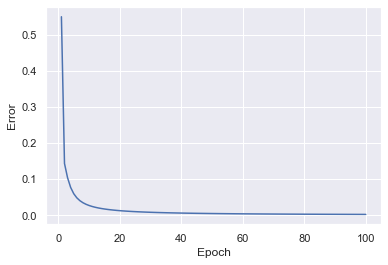

In [65]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

plt.plot(range(1, 101), losses)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

[![TRAINING MLP VIDEO]()](https://www.youtube.com/embed/nrnxZVEHZCo)

## Otras funciones de Activación:

#### ReLU : Rectified Linear Unit

$f(x) = 0$ si $x<0$ 

$f(x)=x$ si $x>=0$

#### Softmax: 
Se emplea para "comprimir" un vector K-dimensional, $ \mathbf {z}  $, de valores reales arbitrarios en un vector K-dimensional,$ \sigma (\mathbf {z} )$, de valores reales en el rango [0, 1].

$f(x) = e^x/\sum_i e^{x_i}$
